## Visualizing the distribution of a dataset

http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set(color_codes=True)

In [5]:
np.random.seed(sum(map(ord, "distributions")))

In [6]:
x = np.random.normal(size=100)


In [7]:
x

array([ 0.42852369,  1.19133255, -0.45820746, -1.85860798,  1.02445299,
        0.69330216,  0.78849804,  0.38978006,  0.28186484,  2.87595634,
       -0.47628215,  1.68025623, -0.39550873, -0.31309963, -1.08837344,
        1.35804163,  0.99799477, -1.56900497,  0.45547916, -1.21679124,
       -0.75801737, -0.07849588, -0.10971737,  0.81419187,  0.85226952,
        0.63110924, -0.00947497,  0.89289944,  1.38285579, -1.49399717,
        0.47088875, -0.01288971, -0.44335464,  2.14135081, -1.30731012,
        0.85712756, -1.33106341,  2.02990049,  0.4914988 ,  1.13272871,
        0.31018322, -0.68251238, -1.03515012,  0.92090423, -0.2528402 ,
        0.04264866,  0.12932479,  0.22791984,  0.27501328,  2.25623038,
        0.86225469,  0.83121643, -1.02652783, -0.57345982,  0.44343461,
       -0.23975428, -0.78221362,  0.9580867 ,  0.46108662, -0.03729805,
       -0.15460078,  0.68695857,  0.42026656, -0.19984644, -1.83236953,
       -0.6656998 , -1.31992855, -0.36497473,  0.17610984, -0.54

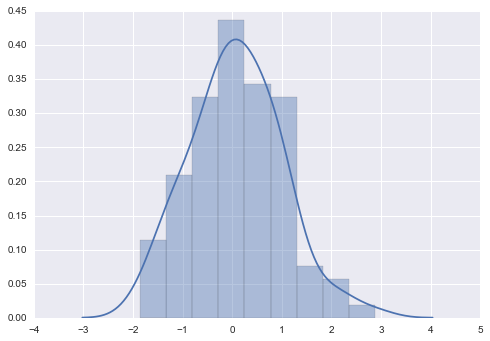

In [8]:
sns.distplot(x);

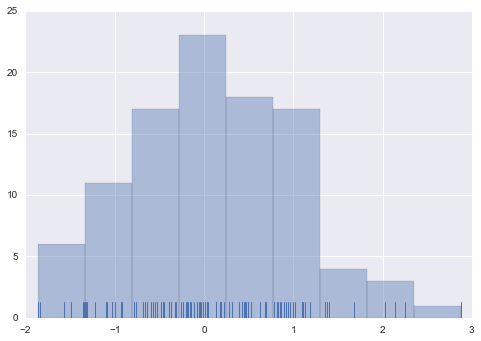

In [9]:
sns.distplot(x, kde=False, rug=True);

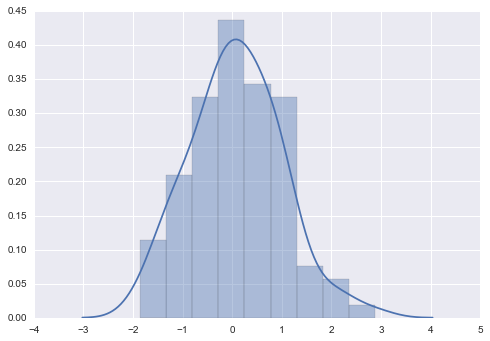

In [10]:
sns.distplot(x, kde=True, rug=False);

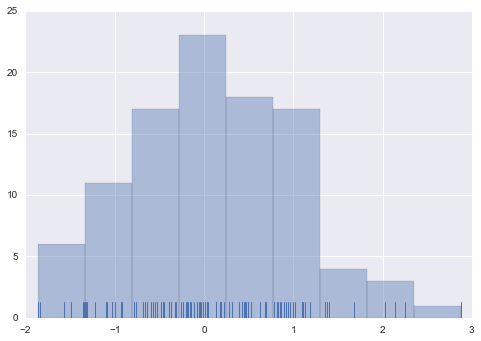

In [11]:
sns.distplot(x, kde=False, rug=True);

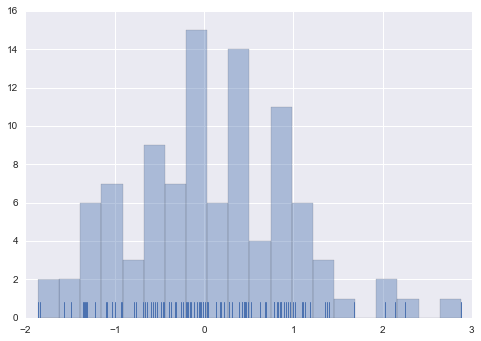

In [12]:
sns.distplot(x, bins=20, kde=False, rug=True);

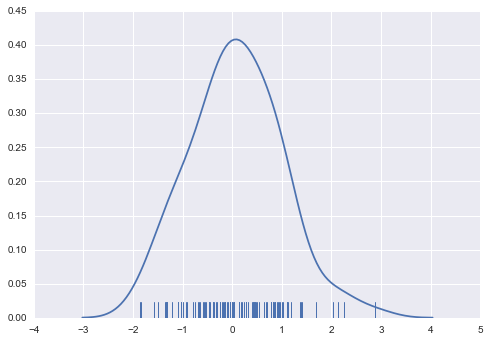

In [13]:
sns.distplot(x, hist=False, rug=True);

In [14]:
x = np.random.normal(0, 1, size=30)

In [15]:
x

array([ 0.7352826 ,  0.7171099 ,  0.96283844,  0.22137047, -0.07936705,
        2.35623791,  0.16982373, -1.65983154,  1.38854404, -1.56926211,
       -0.73055429, -0.60257736,  0.89826375,  0.78206761, -0.14125437,
       -0.44724594,  0.2919698 ,  0.42711494,  0.59431423,  0.1539176 ,
       -1.53200567, -0.56955878,  0.78831908,  0.28275372, -0.58649792,
       -1.16397748,  0.28894759, -0.2634361 , -1.50246105, -1.75745611])

In [16]:
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)

In [17]:
bandwidth

0.52268815484812281

In [18]:
support = np.linspace(-4, 4, 200)

In [19]:
support

array([-4.        , -3.95979899, -3.91959799, -3.87939698, -3.83919598,
       -3.79899497, -3.75879397, -3.71859296, -3.67839196, -3.63819095,
       -3.59798995, -3.55778894, -3.51758794, -3.47738693, -3.43718593,
       -3.39698492, -3.35678392, -3.31658291, -3.27638191, -3.2361809 ,
       -3.1959799 , -3.15577889, -3.11557789, -3.07537688, -3.03517588,
       -2.99497487, -2.95477387, -2.91457286, -2.87437186, -2.83417085,
       -2.79396985, -2.75376884, -2.71356784, -2.67336683, -2.63316583,
       -2.59296482, -2.55276382, -2.51256281, -2.47236181, -2.4321608 ,
       -2.3919598 , -2.35175879, -2.31155779, -2.27135678, -2.23115578,
       -2.19095477, -2.15075377, -2.11055276, -2.07035176, -2.03015075,
       -1.98994975, -1.94974874, -1.90954774, -1.86934673, -1.82914573,
       -1.78894472, -1.74874372, -1.70854271, -1.66834171, -1.6281407 ,
       -1.5879397 , -1.54773869, -1.50753769, -1.46733668, -1.42713568,
       -1.38693467, -1.34673367, -1.30653266, -1.26633166, -1.22

In [20]:
kernels = []

In [21]:
kernels

[]

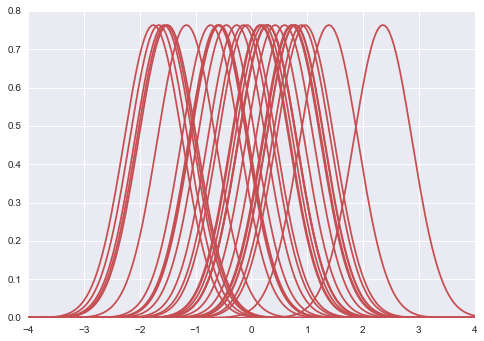

In [22]:
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

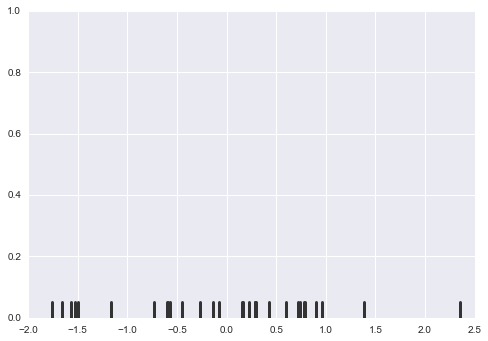

In [23]:
sns.rugplot(x, color=".2", linewidth=3);

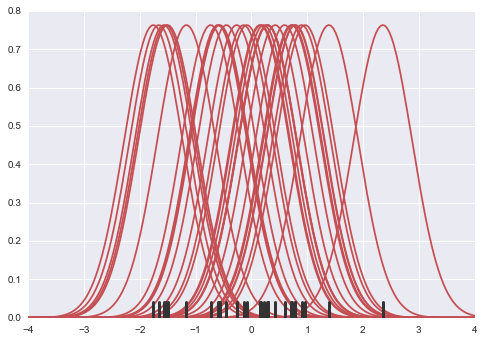

In [24]:
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

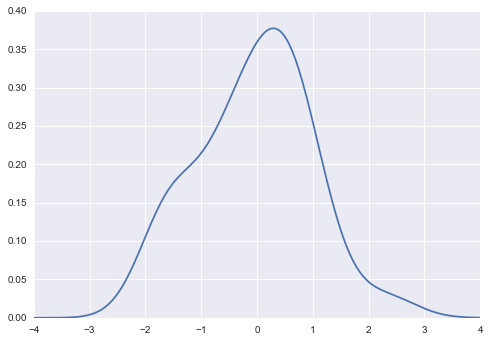

In [25]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

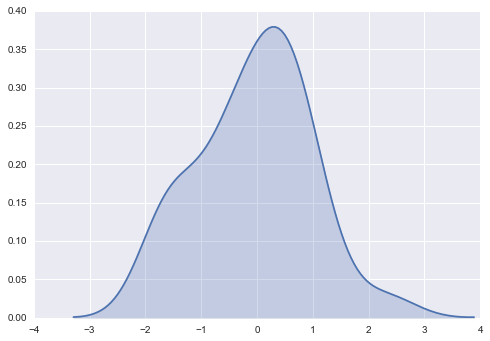

In [26]:
sns.kdeplot(x, shade=True);

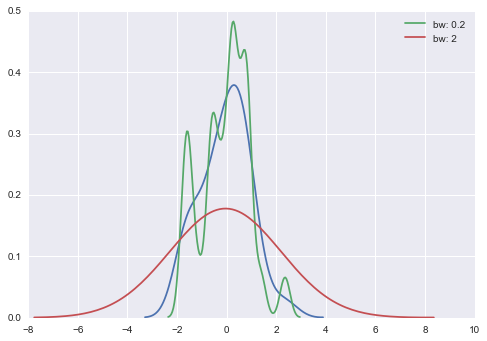

In [27]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

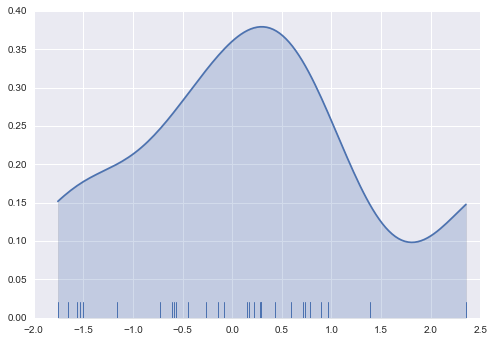

In [28]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

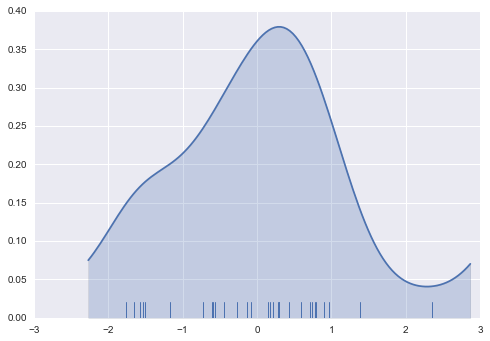

In [29]:
sns.kdeplot(x, shade=True, cut=1)
sns.rugplot(x);

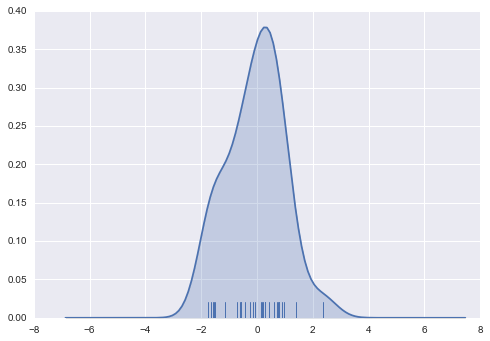

In [30]:
sns.kdeplot(x, shade=True, cut=10)
sns.rugplot(x);

# Fitting parametric distributions

In [31]:
x = np.random.gamma(6, size=200)
#sns.distplot(x, kde=False, fit=stats.gamma);

In [32]:
x

array([  2.99907362,   4.09313548,  12.12571198,   7.01256669,
         4.9557517 ,   4.05953038,   3.74197101,   6.82790648,
         6.23961483,   2.62931586,   5.05144745,   5.01772557,
         6.20751631,   4.07702762,  11.23941262,   3.971715  ,
         6.30727009,   6.60628601,   5.93604259,   3.66254408,
         9.01548014,   7.9995251 ,   6.27571208,   6.59253863,
         5.02382157,   2.49944156,   5.05324528,   7.12339718,
         2.80286283,   7.1520659 ,   6.72503671,   7.22150757,
         7.83375188,   3.25537349,  10.87087732,   5.61507973,
         8.09679917,   3.59759672,   9.66873549,   3.94310378,
         6.14644894,   4.61396081,   2.70858847,   4.7404292 ,
         5.63583857,   6.12379183,   3.94558998,   5.44674012,
         4.62825446,   6.84155672,   8.11696485,   4.76596201,
         7.54544976,   9.17533288,   1.81818774,  11.31200013,
         4.15554974,   3.1615185 ,   8.23974891,   6.29557631,
         4.07736663,   1.9071141 ,   6.22394495,   4.68

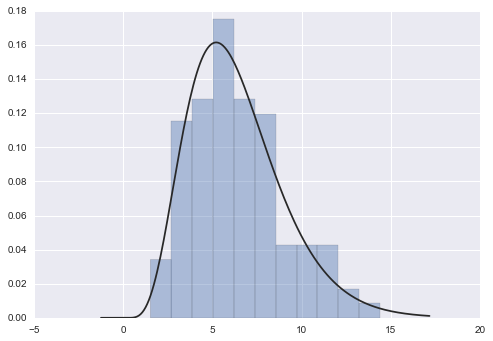

In [33]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);